In [2]:
# these three import lines are essential for running a quantum circuit 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator
# also import a visualization tool from qiskit
from qiskit.tools.visualization import plot_histogram
# import numpy incase we need it
import numpy as np


              ░ ┌─┐   
q_0: |0>──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
{'01': 1000}


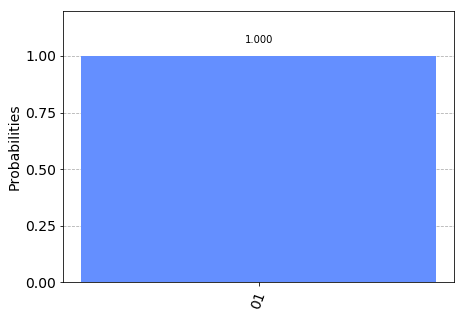

In [3]:
N = 2

# create a quantum register of N qubits, called 'q'. Note that the qubits in the drawing 
# are labelled a q_i
qreg = QuantumRegister(N,'q')
# create a classical register of N bits, called 'c'. Note that the bits in the drawing 
# are labelled a c_i
creg = ClassicalRegister(N,'c')

# create a quantum circuit with one quantum register and one classical register. 
circ = QuantumCircuit(qreg,creg)

# only one gate in our circuit
# you are add more from the list at 
# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
circ.x(1)

# barriers don't do anything (for now), but they will help you separate
# different parts of the circuit visually.
circ.barrier()

# finally measure the quantum register qreg and put the results in 
# the classical register creg
#circ.measure(qreg,creg)

# one thing you will notice is that the classical bitstrings are written reversed: "c_1 c_0"
# rather than "c_0 c_1" I find it very annoying.
# If you use the following measure command instead, it will write the bitstrings correctly.
circ.measure(range(N),list(reversed(range(N))))

# draw the circuit. Not necessary, and you won't want to do this for very 
# large circuits later on.
print(circ.draw())

# Now we are ready to simulate the quantum circuit
# declare that you want to simulate on the simulator 'qasm_simulator'. There are others.
simulator = Aer.get_backend('qasm_simulator')

# simulate the circuit a number of times
job = execute(circ,simulator,shots=1000)

# get the results out
result = job.result()

# usually, we only care about the counts
counts = result.get_counts()
print(counts)

# plot them as a histogram. Not very useful now, but can be later on.
plot_histogram(counts)

In [4]:
# you can always the simulation of a circuit inside a python function
def CX(input):

    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)
    
    # Encode the input into the state of the qubits
    
    if input[0] == 1:
        circ.x(0)
    if input[1] == 1:
        circ.x(1)
    
    # put the inputs into the CX gate
    circ.cx(0,1)

    circ.measure(range(N),list(reversed(range(N))))


    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()

    return counts

### Question 1

In [5]:
for i in range(0,2):
    for j in range(0,2):
        print("Input: ",[i,j], "Ouput:",CX([i,j]))

Input:  [0, 0] Ouput: {'00': 1000}
Input:  [0, 1] Ouput: {'01': 1000}
Input:  [1, 0] Ouput: {'11': 1000}
Input:  [1, 1] Ouput: {'10': 1000}


### Question 2

In [6]:
N = 3
qreg = QuantumRegister(N,'q')
creg = ClassicalRegister(N,'c')

circ = QuantumCircuit(qreg,creg)
circ.ccx(0,1,2)
circ.barrier()
circ.measure(range(N),list(reversed(range(N))))
print(circ.draw())


              ░ ┌─┐      
q_0: |0>──■───░─┤M├──────
          │   ░ └╥┘┌─┐   
q_1: |0>──■───░──╫─┤M├───
        ┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: |0>┤ X ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
 c_0: 0 ═════════╬══╬══╩═
                 ║  ║    
 c_1: 0 ═════════╬══╩════
                 ║       
 c_2: 0 ═════════╩═══════
                         


In [7]:
# you can always the simulation of a circuit inside a python function
def CCX(input):

    N = 3
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)
    
    # Encode the input into the state of the qubits
    for i in range(0,len(input)):
        if input[i] == 1:
            circ.x(i)
    
    # put the inputs into the CCX gate
    circ.ccx(0,1,2)
    
    circ.measure(range(N),list(reversed(range(N))))

    print(circ.draw())
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()

    return counts

In [8]:
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            print("Input: ",[i,j,k],"Ouput: ",CCX([i,j,k]))

             ┌─┐      
q_0: |0>──■──┤M├──────
          │  └╥┘┌─┐   
q_1: |0>──■───╫─┤M├───
        ┌─┴─┐ ║ └╥┘┌─┐
q_2: |0>┤ X ├─╫──╫─┤M├
        └───┘ ║  ║ └╥┘
 c_0: 0 ══════╬══╬══╩═
              ║  ║    
 c_1: 0 ══════╬══╩════
              ║       
 c_2: 0 ══════╩═══════
                      
Input:  [0, 0, 0] Ouput:  {'000': 1000}
                  ┌─┐      
q_0: |0>───────■──┤M├──────
               │  └╥┘┌─┐   
q_1: |0>───────■───╫─┤M├───
        ┌───┐┌─┴─┐ ║ └╥┘┌─┐
q_2: |0>┤ X ├┤ X ├─╫──╫─┤M├
        └───┘└───┘ ║  ║ └╥┘
 c_0: 0 ═══════════╬══╬══╩═
                   ║  ║    
 c_1: 0 ═══════════╬══╩════
                   ║       
 c_2: 0 ═══════════╩═══════
                           
Input:  [0, 0, 1] Ouput:  {'001': 1000}
                  ┌─┐      
q_0: |0>───────■──┤M├──────
        ┌───┐  │  └╥┘┌─┐   
q_1: |0>┤ X ├──■───╫─┤M├───
        └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: |0>─────┤ X ├─╫──╫─┤M├
             └───┘ ║  ║ └╥┘
 c_0: 0 ═══════════╬══╬══╩═
                   ║  ║    
 c_1:

### Question 3

In [9]:
# you can always the simulation of a circuit inside a python function
def X(input):

    N = 1
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)
    
    # Encode the input into the state of the qubits
    for i in range(0,len(input)):
        if input[i] == 1:
            circ.x(i)
    
    # put the inputs into the X gate
    circ.x(0)

    circ.measure(range(N),list(reversed(range(N))))

    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()

    return counts


In [10]:
def HZH(input):

    N = 1
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)
    
    # Encode the input into the state of the qubits
    for i in range(0,len(input)):
        if input[i] == 1:
            circ.x(i)
    
    # put the inputs into H, Z and then H gate
    circ.h(0)
    circ.z(0)
    circ.h(0)
    circ.measure(range(N),list(reversed(range(N))))

    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()

    return counts

In [11]:
for i in range(0,2):
    print("Input:",[i],"Ouput:",X([i]))

        ┌───┐┌─┐
q_0: |0>┤ X ├┤M├
        └───┘└╥┘
 c_0: 0 ══════╩═
                
Input: [0] Ouput: {'1': 1000}
        ┌───┐┌───┐┌─┐
q_0: |0>┤ X ├┤ X ├┤M├
        └───┘└───┘└╥┘
 c_0: 0 ═══════════╩═
                     
Input: [1] Ouput: {'0': 1000}


### Question 4 

In [12]:
def f0(lst):
    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)

    # Encode the input into the state of the qubits
    for i in range(0,len(lst)):
        if lst[i] == 1:
            circ.x(i)
    circ.barrier()

    circ.measure(range(N),list(reversed(range(N))))
    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts
    

In [13]:
for i in range(0,2):
    for j in range(0,2):
        print("Input: ",[i,j], "Ouput:",f0([i,j]))

         ░ ┌─┐   
q_0: |0>─░─┤M├───
         ░ └╥┘┌─┐
q_1: |0>─░──╫─┤M├
         ░  ║ └╥┘
 c_0: 0 ════╬══╩═
            ║    
 c_1: 0 ════╩════
                 
Input:  [0, 0] Ouput: {'00': 1000}
              ░ ┌─┐   
q_0: |0>──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [0, 1] Ouput: {'01': 1000}
        ┌───┐ ░ ┌─┐   
q_0: |0>┤ X ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
q_1: |0>──────░──╫─┤M├
              ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [1, 0] Ouput: {'10': 1000}
        ┌───┐ ░ ┌─┐   
q_0: |0>┤ X ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [1, 1] Ouput: {'11': 1000}


In [14]:
def f1(lst):
    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)

    # Encode the input into the state of the qubits
    for i in range(0,len(lst)):
        if lst[i] == 1:
            circ.x(i)
    # put the inputs into the CX gate
    circ.cx(0,1)    
    circ.barrier()
    circ.measure(range(N),list(reversed(range(N))))
    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts
    

In [15]:
for i in range(0,2):
    for j in range(0,2):
        print("Input: ",[i,j], "Output:",f1([i,j]))

              ░ ┌─┐   
q_0: |0>──■───░─┤M├───
        ┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [0, 0] Output: {'00': 1000}
                   ░ ┌─┐   
q_0: |0>───────■───░─┤M├───
        ┌───┐┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
                           
Input:  [0, 1] Output: {'01': 1000}
        ┌───┐      ░ ┌─┐   
q_0: |0>┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
                           
Input:  [1, 0] Output: {'11': 1000}
        ┌───┐      ░ ┌─┐   
q_0: |0>┤ X ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
             

In [16]:
def f2(lst):
    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)

    # Encode the input into the state of the qubits
    for i in range(0,len(lst)):
        if lst[i] == 1:
            circ.x(i)
    # put the inputs into the CX gate
    circ.x(1)
    circ.cx(0,1)

    circ.barrier()
    circ.measure(range(N),list(reversed(range(N))))
    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts
    

In [17]:
for i in range(0,2):
    for j in range(0,2):
        print("Input: ",[i,j], "Output:",f2([i,j]))

                   ░ ┌─┐   
q_0: |0>───────■───░─┤M├───
        ┌───┐┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
                           
Input:  [0, 0] Output: {'01': 1000}
                        ░ ┌─┐   
q_0: |0>────────────■───░─┤M├───
        ┌───┐┌───┐┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘└───┘ ░  ║ └╥┘
 c_0: 0 ═══════════════════╬══╩═
                           ║    
 c_1: 0 ═══════════════════╩════
                                
Input:  [0, 1] Output: {'00': 1000}
        ┌───┐      ░ ┌─┐   
q_0: |0>┤ X ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
                           
Input:  [1, 0] Output: {'10': 1000}
        ┌───┐           ░ ┌─┐   
q_0: |0>┤ X ├───────■───░─┤M├───
        ├───┤┌───┐┌─┴─┐ ░

In [18]:
def f3(lst):
    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)

    # Encode the input into the state of the qubits
    for i in range(0,len(lst)):
        if lst[i] == 1:
            circ.x(i)
    # put the inputs into the CX gate
    circ.x(1)

    circ.barrier()
    circ.measure(range(N),list(reversed(range(N))))
    print(circ.draw())

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts
    

In [19]:
for i in range(0,2):
    for j in range(0,2):
        print("Input: ",[i,j], "Output:",f3([i,j]))

              ░ ┌─┐   
q_0: |0>──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [0, 0] Output: {'01': 1000}
                   ░ ┌─┐   
q_0: |0>───────────░─┤M├───
        ┌───┐┌───┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
                           
Input:  [0, 1] Output: {'00': 1000}
        ┌───┐ ░ ┌─┐   
q_0: |0>┤ X ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
q_1: |0>┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
 c_0: 0 ═════════╬══╩═
                 ║    
 c_1: 0 ═════════╩════
                      
Input:  [1, 0] Output: {'11': 1000}
        ┌───┐      ░ ┌─┐   
q_0: |0>┤ X ├──────░─┤M├───
        ├───┤┌───┐ ░ └╥┘┌─┐
q_1: |0>┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
 c_0: 0 ══════════════╬══╩═
                      ║    
 c_1: 0 ══════════════╩════
  

### Question 5


In [20]:
def f0(circ):
    pass

In [21]:
def f1(circ):
    circ.cx(0, 1)

In [22]:
def f2(circ):
    circ.x(1)
    circ.cx(0,1)

In [23]:
def f3(circ):
    circ.x(1)

In [49]:
def Deutsch(control):
    N = 2
    qreg = QuantumRegister(N,'q')
    creg = ClassicalRegister(N,'c')
    circ = QuantumCircuit(qreg,creg)

    circ.h(0)
    circ.x(1)
    circ.h(1)
    dic= {1:f0,2:f1,3:f2,4:f3}
    dic[control](circ)
    
    circ.h(0)
    circ.measure(range(N),list(reversed(range(N))))
    print(circ.draw())
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1)
    result = job.result()
    counts = result.get_counts()

    output = int(list(counts.keys())[0][0])
    if output==1:
        return "function is balanced"
    if output==0:
        return "function is constant"
    


In [50]:
Deutsch(4)

        ┌───┐┌───┐     ┌─┐   
q_0: |0>┤ H ├┤ H ├─────┤M├───
        ├───┤├───┤┌───┐└╥┘┌─┐
q_1: |0>┤ X ├┤ H ├┤ X ├─╫─┤M├
        └───┘└───┘└───┘ ║ └╥┘
 c_0: 0 ════════════════╬══╩═
                        ║    
 c_1: 0 ════════════════╩════
                             


'function is constant'

In [51]:
Deutsch(3)

        ┌───┐               ┌───┐┌─┐
q_0: |0>┤ H ├────────────■──┤ H ├┤M├
        ├───┤┌───┐┌───┐┌─┴─┐└┬─┬┘└╥┘
q_1: |0>┤ X ├┤ H ├┤ X ├┤ X ├─┤M├──╫─
        └───┘└───┘└───┘└───┘ └╥┘  ║ 
 c_0: 0 ══════════════════════╩═══╬═
                                  ║ 
 c_1: 0 ══════════════════════════╩═
                                    


'function is balanced'

In [53]:
Deutsch(2)

        ┌───┐          ┌───┐┌─┐
q_0: |0>┤ H ├───────■──┤ H ├┤M├
        ├───┤┌───┐┌─┴─┐└┬─┬┘└╥┘
q_1: |0>┤ X ├┤ H ├┤ X ├─┤M├──╫─
        └───┘└───┘└───┘ └╥┘  ║ 
 c_0: 0 ═════════════════╩═══╬═
                             ║ 
 c_1: 0 ═════════════════════╩═
                               


'function is balanced'

In [54]:
Deutsch(1)

        ┌───┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ H ├┤M├───
        ├───┤├───┤└╥┘┌─┐
q_1: |0>┤ X ├┤ H ├─╫─┤M├
        └───┘└───┘ ║ └╥┘
 c_0: 0 ═══════════╬══╩═
                   ║    
 c_1: 0 ═══════════╩════
                        


'function is constant'

In [ ]:
#Discussed Deutsch's Algorithm with Sheheryar